In [6]:
from pandas_datareader import data # pip install pandas_datareader
import matplotlib.pyplot as plt    # pip install matplotlib
import pandas as pd                # pip install pandas
data = data.DataReader("2330.TW", "yahoo", "2018-01-01","2018-01-05")
data
# c = data['Close']
# c.plot()

High    Low   Open  Close    Volume   Adj Close
Date                                                        
2018-01-02  232.5  231.0  231.5  232.5  18055269  213.912537
2018-01-03  238.0  235.5  236.0  237.0  29308091  218.052811
2018-01-04  240.0  236.5  240.0  239.5  29096613  220.352921
2018-01-05  240.0  238.0  240.0  240.0  22438255  220.812943

In [12]:
import yfinance as yf
comp = yf.Ticker("2330.TW")
# comp.info
# comp.quarterly_earnings

Empty DataFrame
Columns: [Open, High, Low, Close, Adj Close, Volume]
Index: []

In [48]:
index= 'MSFT'
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index + '/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index
print(url_is)
print(url_bs)
print(url_cf)

https://finance.yahoo.com/quote/MSFT/financials?p=MSFT
https://finance.yahoo.com/quote/MSFT/balance-sheet?p=MSFT
https://finance.yahoo.com/quote/MSFT/cash-flow?p=MSFT


In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as ur
index= 'MSFT'
# URL link 
url_is = 'https://finance.yahoo.com/quote/' + index + '/financials?p=' + index
url_bs = 'https://finance.yahoo.com/quote/' + index + '/balance-sheet?p=' + index
url_cf = 'https://finance.yahoo.com/quote/' + index + '/cash-flow?p='+ index

def get_balance_st():
    read_data = ur.urlopen(url_bs).read() 
    soup_is= BeautifulSoup(read_data,'lxml')
    ls= [] # Create empty list
    for l in soup_is.find_all('div'): 
      #Find all data structure that is 'div'
        ls.append(l.string) # add each element one by one to the list
        ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
    new_ls = list(filter(None,ls))
    new_ls = new_ls[12:]
    is_data = list(zip(*[iter(new_ls)]*5))
    df = pd.DataFrame(is_data[0:])
    df=df.T
#     df = convert_to_int(df)
    return df

def get_income_st():
    read_data = ur.urlopen(url_is).read() 
    soup_is= BeautifulSoup(read_data,'lxml')
    ls= [] # Create empty list
    for l in soup_is.find_all('div'): 
      #Find all data structure that is 'div'
        ls.append(l.string) # add each element one by one to the list
        ls = [e for e in ls if e not in ('Operating Expenses','Non-recurring Events')] # Exclude those columns
    new_ls = list(filter(None,ls))
    new_ls = new_ls[12:]
    is_data = list(zip(*[iter(new_ls)]*6))
    Income_st = pd.DataFrame(is_data[0:])
    # Income_st

    #Data Cleaning
    Income_st.columns = Income_st.iloc[0] # Name columns to first row of dataframe
    Income_st = Income_st.iloc[1:,] # start to read 1st row
    Income_st = Income_st.T # transpose dataframe
    Income_st.columns = Income_st.iloc[0] #Name columns to first row of dataframe
    Income_st.drop(Income_st.index[0],inplace=True) #Drop first index row
    Income_st.index.name = '' # Remove the index name
    Income_st.rename(index={'ttm': '12/31/2019'},inplace=True) #Rename ttm in index columns to end of the year
    Income_st = Income_st[Income_st.columns[:-5]] # remove last 5 irrelevant columns
    Income_st = convert_to_int(Income_st)
    return Income_st

def convert_to_int(df): 
    col = df.columns
    for col in df: 
        temp = df[col].to_string().replace(',','').split('\n') #     Replace comma with space and clean out extra spaces
        temp.pop(0) #Remove first erronous element
        df.index = pd.to_datetime(df.index) # Convert index to datetime 
        df[col]= [i[10:].strip() for i in temp] # stripping off nth characters
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int) # Transform columns from   object to numeric
    return df

# Income_st=get_income_st()
balance_st=get_balance_st()
balance_st
# ratio = pd.DataFrame()
# ratio['effective tax rate']= Income_st['Income Tax Expense']/Income_st['Income Before Tax']
# ratio['net operating margin']= (Income_st['Income Before Tax']+Income_st['Interest Expense']*(1-ratio['effective tax rate']))/Income_st['Total Revenue']
# ratio['net operating asset turnover'] = Income_st['Total Revenue']/((balance_st['Total liabilities and stockholders\' equity']+balance_st['Total liabilities and stockholders\' equity'].shift(1))/2)
# ratio['Return on NOA']= ratio['net operating margin']*ratio['net operating asset turnover']
# ratio['Net financial expense'] = Income_st['Interest Expense']*(1-ratio['effective tax rate'])
# ratio['Net borrowing cost']= ratio['Net financial expense']/(balance_st['Total Liabilities']+balance_st['Total Liabilities'].shift(1)/2)
# ratio['spread']= ratio['Return on NOA']-ratio['Net borrowing cost']
# ratio['leverage'] =(balance_st['Total Liabilities']+balance_st['Total Liabilities'].shift(-1)/2) / (balance_st['Total liabilities and stockholders\' equity']+balance_st['Total liabilities and stockholders\' equity'].shift(1))/2
# ratio['ROE(Advanced dupont)'] = ratio['Return on NOA']+ ratio['leverage']*ratio['spread']
# ratio

0                          1                       2            3   \
0     Annual  Cash And Cash Equivalents  Short Term Investments   Total Cash   
1  6/29/2019                 11,356,000             122,463,000  133,819,000   
2  6/29/2018                 11,946,000             121,822,000  133,768,000   
3  6/29/2017                  7,663,000             125,318,000  132,981,000   
4  6/29/2016                  6,510,000             106,730,000  113,240,000   

                4          5                     6                     7   \
0  Net Receivables  Inventory  Other Current Assets  Total Current Assets   
1       29,524,000  2,063,000            10,146,000           175,552,000   
2       26,481,000  2,662,000             6,751,000           169,662,000   
3       19,792,000  2,181,000             4,897,000           159,851,000   
4       18,277,000  2,251,000             5,892,000           139,660,000   

                                    8                         9   ...  \
0  Gross property, plant and equipment  Accumulated Depreciation  ...   
1                           79,186,000               -35,330,000  ...   
2                           65,369,000               -29,223,000  ...   
3                           47,913,000               -24,179,000  ...   
4                           38,156,000               -19,800,000  ...   

                           25                 26                           27  \
0  Deferred taxes liabilities  Deferred revenues  Other long-term liabilities   
1                     233,000          4,530,000                    7,581,000   
2                     541,000          3,815,000                    5,211,000   
3                     531,000         10,377,000                   17,184,000   
4                     696,000          6,441,000                   14,420,000   

                              28                 29            30  \
0  Total non-current liabilities  Total Liabilities  Common Stock   
1                    114,806,000        184,226,000    78,520,000   
2                    117,642,000        176,130,000    71,223,000   
3                    104,165,000        168,692,000    69,315,000   
4                     62,340,000        121,697,000    68,178,000   

                  31                                      32  \
0  Retained Earnings  Accumulated other comprehensive income   
1         24,150,000                                -340,000   
2         13,682,000                              -2,187,000   
3          2,648,000                                 431,000   
4          2,282,000                               1,537,000   

                           33                                          34  
0  Total stockholders' equity  Total liabilities and stockholders' equity  
1                 102,330,000                                 286,556,000  
2                  82,718,000                                 258,848,000  
3                  72,394,000                                 241,086,000  
4                  71,997,000                                 193,694,000  

[5 rows x 35 columns]

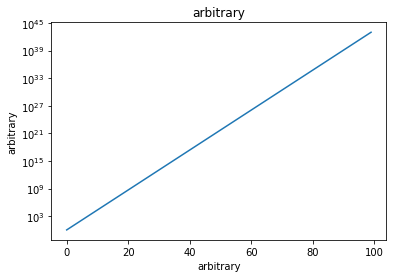

In [7]:
import matplotlib.pyplot as plt
import math
plt.plot([x for x in range(100)],[math.exp(y) for y in range(100)] )
plt.xlabel('arbitrary')
plt.ylabel('arbitrary')
plt.title('arbitrary')

#plt.xscale('log')
plt.yscale('log')

plt.show()

['2357.TW', '3702.TW', '0050.TW', '1402.TW', '2379.TW', '2892.TW', '2891.TW', '2886.TW', '3045.TW', '8422.TW', '1232.TW', '1101.TW', '2002.TW', '2542.TW', '2881.TW', '2412.TW', '1326.TW', '3034.TW', '2301.TW', '2308.TW', '8341.TW', '1216.TW', '2330.TW', '1210.TW', '2356.TW']
len(tickers)=25
nrows=13
today=2020-02-06
type multpl_stocks=<class 'pandas.core.frame.DataFrame'>


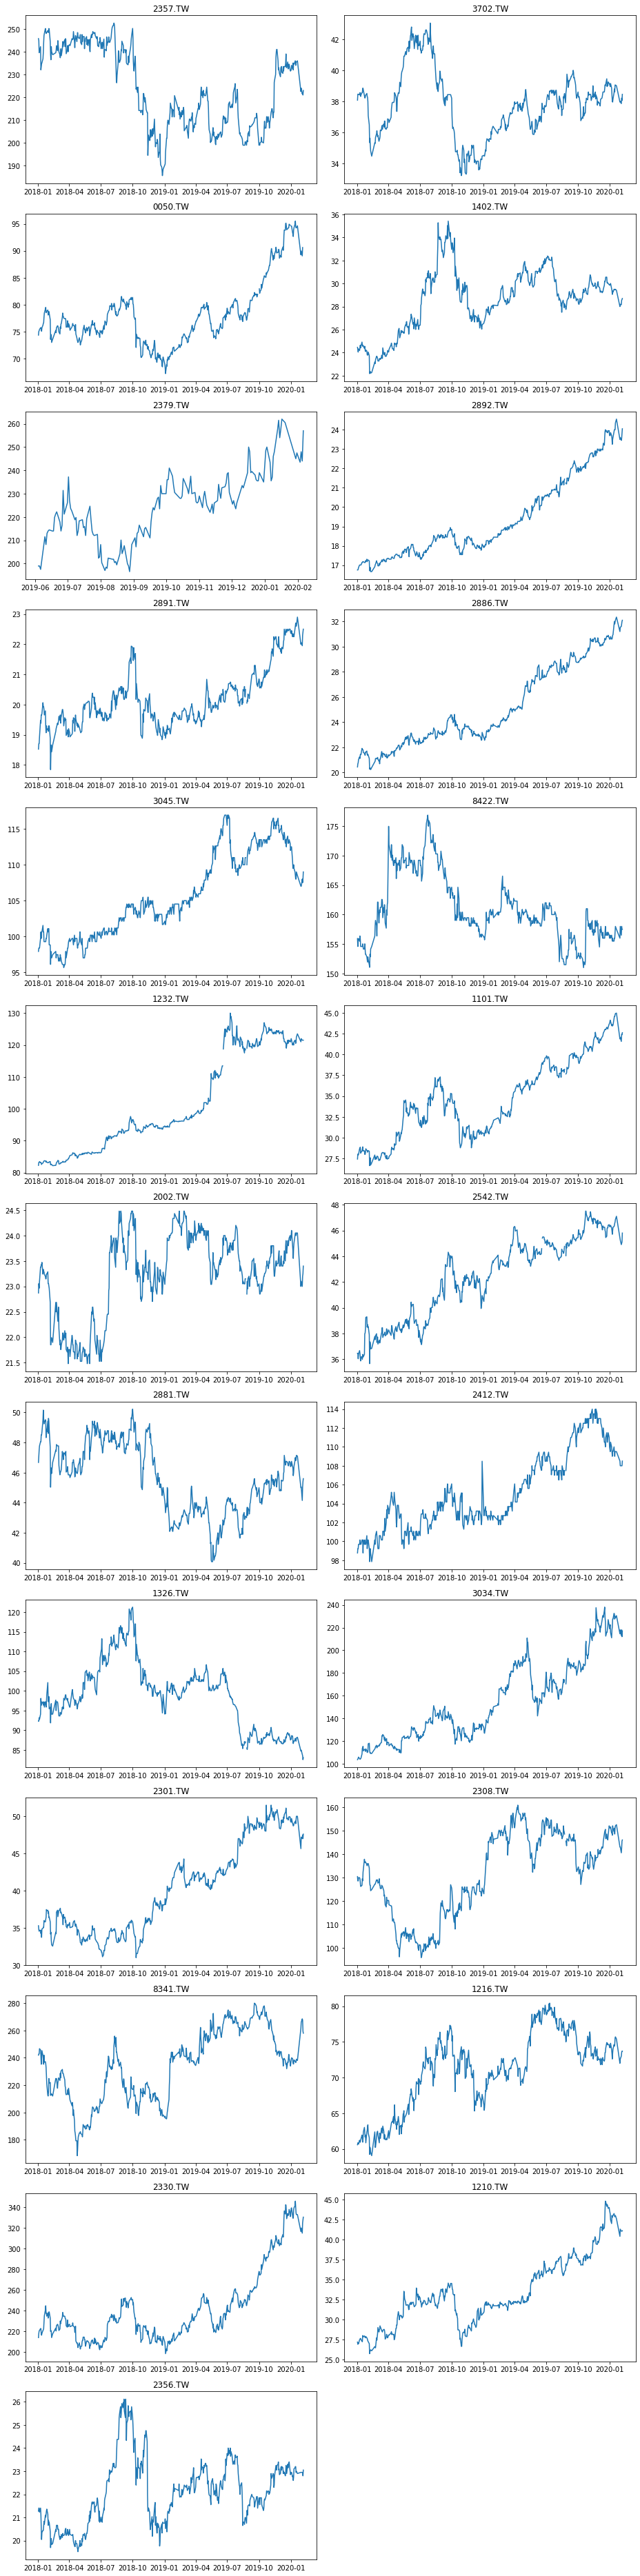

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime
import math
tw_ids="""
2357
3702
0050
1402
2379


2892
2891
2886
3045
8422
1232
1101
2002
2542

2881
2412
1326
3034
2301
2308
8341
1216
2330
1210
2356
"""
tw_ids="""
2357
3702
0050
1402
2379


2892
2891
2886
3045
8422
1232
1101
2002
2542

2881
2412
1326
3034
2301
2308
8341
1216
2330
1210
2356
"""
tickers = tw_ids.split("\n")
tickers = list(filter(None, tickers))
tickers = list(map(lambda x: x + ".TW", tickers))
# tickers = ["FB", "AMZN", "AAPL", "2330.TW"]
print(tickers)
print(f"len(tickers)={len(tickers)}")
nrows = math.ceil(len(tickers) / 2)
print("nrows="+str(nrows))
today = datetime.today().strftime('%Y-%m-%d')
print("today="+today)
# raise
multpl_stocks = web.get_data_yahoo(
tickers,
start = "2018-01-01",
end = today)
print("type multpl_stocks="+str(type(multpl_stocks)))
fig = plt.figure()
fig.set_figheight(4*nrows)
fig.set_figwidth(13)

for i in range(len(tickers)):
    stock_id=tickers[i]
    ax1 = fig.add_subplot(nrows, 2, i+1)
    ax1.plot(multpl_stocks['Adj Close'][stock_id])
#     ax1.set_yscale('log')
    ax1.set_title(stock_id)
plt.tight_layout()
plt.show()

In [26]:
"""date        code    count
20170801    000001      10
20170802    000002      20
20170803    000001      30"""
import pandas as pd
import numpy as np

df = pd.DataFrame(
    {'date': ['20170801', '20170802','20170803'],
     'code': ['000001', '000002', '000001'],
     'count': [10, 20, 30]
    }
)
df.pivot(index='date',columns='code',values='count')

code      000001  000002
date                    
20170801    10.0     NaN
20170802     NaN    20.0
20170803    30.0     NaN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
from datetime import datetime
import math
tw_ids="""
2357
3702
0050
1402
2379


2892
2891
2886
3045
8422
1232
1101
2002
2542

2881
2412
1326
3034
2301
2308
8341
1216
2330
1210
2356
"""
tw_ids="""
2357
3702
"""
tickers = tw_ids.split("\n")
tickers = list(filter(None, tickers))
tickers = list(map(lambda x: x + ".TW", tickers))
# tickers = ["FB", "AMZN", "AAPL", "2330.TW"]
print(tickers)
print(f"len(tickers)={len(tickers)}")
nrows = math.ceil(len(tickers) / 2)
print("nrows="+str(nrows))
today = datetime.today().strftime('%Y-%m-%d')
print("today="+today)
# raise
multpl_stocks = web.get_data_yahoo(
tickers,
start = "2018-01-01",
end = today)
print("type multpl_stocks="+str(type(multpl_stocks)))
fig = plt.figure()
fig.set_figheight(4*nrows)
fig.set_figwidth(13)

#Bollinger Band in Python
# Calculate 30 Day Moving Average, Std Deviation, Upper Band and Lower Band
for item in (len(tickers)):
    print(str(item))
    item['30 Day MA'] = multpl_stocks['Adj Close'].rolling(window=20).mean()
    
#     # set .std(ddof=0) for population std instead of sample
#     item['30 Day STD'] = item['Adj Close'].rolling(window=20).std() 
    
#     item['Upper Band'] = item['30 Day MA'] + (item['30 Day STD'] * 2)
#     item['Lower Band'] = item['30 Day MA'] - (item['30 Day STD'] * 2)
assert False

for i in range(len(tickers)):
    stock_id=tickers[i]
    ax1 = fig.add_subplot(nrows, 2, i+1)
    ax1.plot(multpl_stocks['Adj Close'][stock_id])
#     ax1.set_yscale('log')
    ax1.set_title(stock_id)
plt.tight_layout()
plt.show()

['2357.TW', '3702.TW']
len(tickers)=2
nrows=1
today=2020-02-16
type multpl_stocks=<class 'pandas.core.frame.DataFrame'>


TypeError: 'int' object is not iterable

<Figure size 936x288 with 0 Axes>